In [1]:
import pandas as pd
import numpy as np
import pickle
import xgboost as xgb
import datetime
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
pd.set_option('display.max_columns', None)
import lightgbm as lgb
from sklearn.metrics import log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from tqdm import tqdm
import time

import geopandas as gpd
import pandas as pd
from shapely.geometry import Point, MultiPoint
from shapely.ops import nearest_points
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import time
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
from sklearn.metrics import log_loss
import seaborn
from sklearn import linear_model
def r2(a, b):
    return np.corrcoef(a, b)*np.corrcoef(a, b)

In [3]:
df=pd.read_csv('DATA.csv', encoding='cp932')
df=df.dropna(axis=0)

y=df['EColi.']
X=df.loc[:, ['up_down', 'curvature', 'inclination', 'tilt_direction', 'altitude', 'disto_river', 'disto_stations', 
             'disto_mainroad', 'disto_syorizyo', 'supply_hours', 'no_water_days', 'total_population ', 'population_served',
             'popu-served', 'number_taps', 'pipelength', 'pipelength_per_pipe', 'served/pipes', '(popu-served)/pipes', 
             'oldest_pipe_age', 'ST', 'RSF', 'FL', 'PF', 'RF', 'ratio', 'source_ecoli']]

In [4]:
# 分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,
                                                  random_state=1, stratify=y)
print('Labels counts in y:', np.bincount(y))
print('Lables counts in y_train:', np.bincount(y_train))
print('Lables counts in y_test:', np.bincount(y_test))

X_train_std=(X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test_std=(X_test-X_train.mean(axis=0))/X_train.std(axis=0)

def threshold(fare):
    if fare<=0:
        return 0
    else:
        return 1
    
X_train_std['ST']=X_train_std['ST'].apply(threshold)
X_train_std['RSF']=X_train_std['RSF'].apply(threshold)
X_train_std['FL']=X_train_std['FL'].apply(threshold)
X_train_std['PF']=X_train_std['PF'].apply(threshold)
X_train_std['RF']=X_train_std['RF'].apply(threshold)
X_test_std['ST']=X_test_std['ST'].apply(threshold)
X_test_std['RSF']=X_test_std['RSF'].apply(threshold)
X_test_std['FL']=X_test_std['FL'].apply(threshold)
X_test_std['PF']=X_test_std['PF'].apply(threshold)
X_test_std['RF']=X_test_std['RF'].apply(threshold)


# 分割する
X_cross=(X-X.mean(axis=0))/X.std(axis=0)
X_cross['ST']=X_cross['ST'].apply(threshold)
X_cross['RSF']=X_cross['RSF'].apply(threshold)
X_cross['FL']=X_cross['FL'].apply(threshold)
X_cross['PF']=X_cross['PF'].apply(threshold)
X_cross['RF']=X_cross['RF'].apply(threshold)

Labels counts in y: [ 98 120]
Lables counts in y_train: [68 84]
Lables counts in y_test: [30 36]


# LDA

0.7039473684210527
0.6212121212121212


Text(0, 0.5, 'true label')

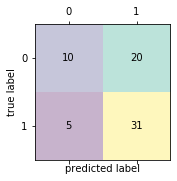

In [37]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_std, y_train)
print(clf.score(X_train_std, y_train))
print(clf.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=clf.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# SVC

0.7171052631578947
0.696969696969697


Text(0, 0.5, 'true label')

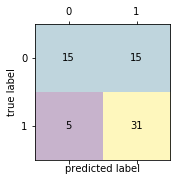

In [38]:
from sklearn.svm import SVC
svm=SVC(kernel='linear', C=100, random_state=1, probability=True)
svm.fit(X_train_std, y_train)
print(svm.score(X_train_std, y_train))
print(svm.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=svm.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# ロジスティック回帰

0.7039473684210527
0.696969696969697


C:\Users\kurokiso\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Text(0, 0.5, 'true label')

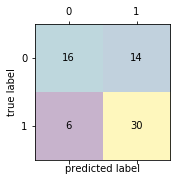

In [15]:
lr=LogisticRegression(C=100, random_state=1)
lr.fit(X_train_std, y_train)
print(lr.score(X_train_std, y_train))
print(lr.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=lr.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# random forest

0.7368421052631579
0.7121212121212122


Text(0, 0.5, 'true label')

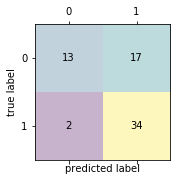

In [16]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=3, criterion='entropy', n_estimators=29, random_state=1)
forest.fit(X_train_std, y_train)
print(forest.score(X_train_std, y_train))
print(forest.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=forest.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

In [54]:
# 可視化

In [61]:
X=df.loc[:, ['X', 'Y', 'up_down', 'curvature', 'inclination', 'tilt_direction', 'altitude', 'disto_river', 'disto_stations', 
             'disto_mainroad', 'disto_syorizyo', 'supply_hours', 'no_water_days', 'total_population ', 'population_served',
             'popu-served', 'number_taps', 'pipelength', 'pipelength_per_pipe', 'served/pipes', '(popu-served)/pipes', 
             'oldest_pipe_age', 'ST', 'RSF', 'FL', 'PF', 'RF', 'ratio', 'source_ecoli']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,
                                                  random_state=1, stratify=y)

In [67]:
df=pd.DataFrame({'y_test':y_test.values, 'y_pred':y_pred})
map=pd.concat([X_test.reset_index(), df], axis=1)
map=map.drop(map.index[5])
map.X=map.X.apply(lambda x: float(x))

In [87]:
geometry = [Point(xy) for xy in zip(map.X, map.Y)]
map= gpd.GeoDataFrame(map, geometry=geometry)

In [123]:
gpd.GeoDataFrame.to_file(map, "test_pred.gpkg", driver="GPKG", encoding='utf-8')

In [130]:
df=df.drop(df.index[[1, 2]])
df.X=df.X.apply(lambda x: float(x))

In [131]:
geometry = [Point(xy) for xy in zip(df.X, df.Y)]
df= gpd.GeoDataFrame(df, geometry=geometry)

In [132]:
gpd.GeoDataFrame.to_file(df, "all.gpkg", driver="GPKG", encoding='utf-8')

# Boosted forest

0.6973684210526315
0.6666666666666666


Text(0, 0.5, 'true label')

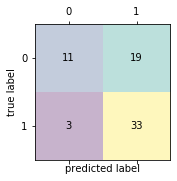

In [17]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(max_depth=2, random_state=1)
ada=AdaBoostClassifier(base_estimator=tree, n_estimators=2, learning_rate=1.5, random_state=1)
ada.fit(X_train_std, y_train)
print(ada.score(X_train_std, y_train))
print(ada.score(X_test_std, y_test))

from sklearn.metrics import confusion_matrix
y_pred=ada.predict(X_test_std)
confmat=confusion_matrix(y_true=y_test, y_pred=y_pred)

import matplotlib.pyplot as plt
fig, ax=plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
        
plt.xlabel('predicted label')
plt.ylabel('true label')

# ROC AUC

In [18]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
import matplotlib.pyplot as plt
mean_fpr=np.linspace(0, 1, 1000)
lda_mean_tpr=0.0
svm_mean_tpr=0.0
lr_mean_tpr=0.0
forest_mean_tpr=0.0
ada_mean_tpr=0.0

In [19]:
lda_probas=clf.predict_proba(X_test_std)
svm_probas=svm.predict_proba(X_test_std)
lr_probas=lr.predict_proba(X_test_std)
forest_probas=forest.predict_proba(X_test_std)
ada_probas=ada.predict_proba(X_test_std)

In [20]:
lda_fpr, lda_tpr, lda_thresholds=roc_curve(y_test, lda_probas[:, 1], pos_label=1)
svm_fpr, svm_tpr, svm_thresholds=roc_curve(y_test, svm_probas[:, 1], pos_label=1)
lr_fpr, lr_tpr, lr_thresholds=roc_curve(y_test, lr_probas[:, 1], pos_label=1)
forest_fpr, forest_tpr, forest_thresholds=roc_curve(y_test, forest_probas[:, 1], pos_label=1)
ada_fpr, ada_tpr, ada_thresholds=roc_curve(y_test, ada_probas[:, 1], pos_label=1)

In [21]:
lda_mean_tpr+=interp(mean_fpr, lda_fpr, lda_tpr)
svm_mean_tpr+=interp(mean_fpr, svm_fpr, svm_tpr)
lr_mean_tpr+=interp(mean_fpr, lr_fpr, lr_tpr)
forest_mean_tpr+=interp(mean_fpr, forest_fpr, forest_tpr)
ada_mean_tpr+=interp(mean_fpr, ada_fpr, ada_tpr)

C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  """Entry point for launching an IPython kernel.
C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  
C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  after removing the cwd from sys.path.
C:\Users\kurokiso\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: scipy.interp is de

In [22]:
lda_mean_tpr[0]=0.0
svm_mean_tpr[0]=0.0
lr_mean_tpr[0]=0.0
forest_mean_tpr[0]=0.0
ada_mean_tpr[0]=0.0

In [23]:
lda_roc_auc=auc(lda_fpr, lda_tpr)
svm_roc_auc=auc(svm_fpr, svm_tpr)
lr_roc_auc=auc(lr_fpr, lr_tpr)
forest_roc_auc=auc(forest_fpr, forest_tpr)
ada_roc_auc=auc(ada_fpr, ada_tpr)

In [24]:
print(lda_roc_auc)
print(svm_roc_auc)
print(lr_roc_auc)
print(forest_roc_auc)
print(ada_roc_auc)

0.6814814814814815
0.7277777777777779
0.7212962962962962
0.7583333333333333
0.6657407407407406


In [25]:
fig=plt.figure(figsize=(7, 5))

<Figure size 504x360 with 0 Axes>

Text(0, 0.5, 'True Positive Rate')

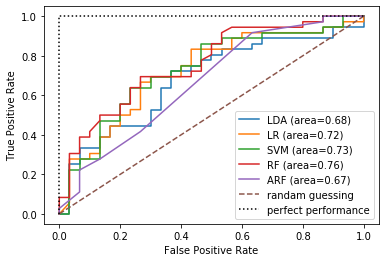

In [27]:
plt.plot(lda_fpr, lda_tpr, label='LDA (area=%0.2f)' %(lda_roc_auc))
plt.plot(lr_fpr, lr_tpr, label='LR (area=%0.2f)' %(lr_roc_auc))
plt.plot(svm_fpr, svm_tpr, label='SVM (area=%0.2f)' %(svm_roc_auc))
plt.plot(forest_fpr, forest_tpr, label='RF (area=%0.2f)' %(forest_roc_auc))
plt.plot(ada_fpr, ada_tpr, label='ARF (area=%0.2f)' %(ada_roc_auc))
plt.plot([0, 1], linestyle='--', label='randam guessing')
plt.plot([0, 0, 1], [0, 1, 1], color='black', linestyle=':', label='perfect performance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(0, 0.5, 'True Positive Rate')

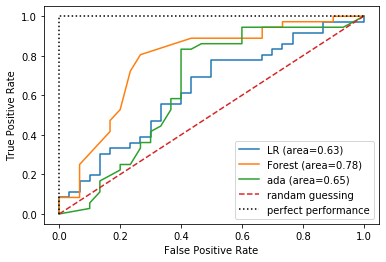

In [92]:
plt.plot(lr_fpr, lr_tpr, label='LR (area=%0.2f)' %(lr_roc_auc))
plt.plot(forest_fpr, forest_tpr, label='Forest (area=%0.2f)' %(forest_roc_auc))
plt.plot(ada_fpr, ada_tpr, label='ada (area=%0.2f)' %(ada_roc_auc))
plt.plot([0, 1], linestyle='--', label='randam guessing')
plt.plot([0, 0, 1], [0, 1, 1], color='black', linestyle=':', label='perfect performance')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')